In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import json
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
protein_embedding_path = '../../../datasets/protein_embedding_fix/'
config_path = protein_embedding_path + 'summary.config'

# load config
with open(config_path, 'r') as r:
    config_dict = json.load(r)

(187, 327680)
(187,)
(374, 327680)
(374,)


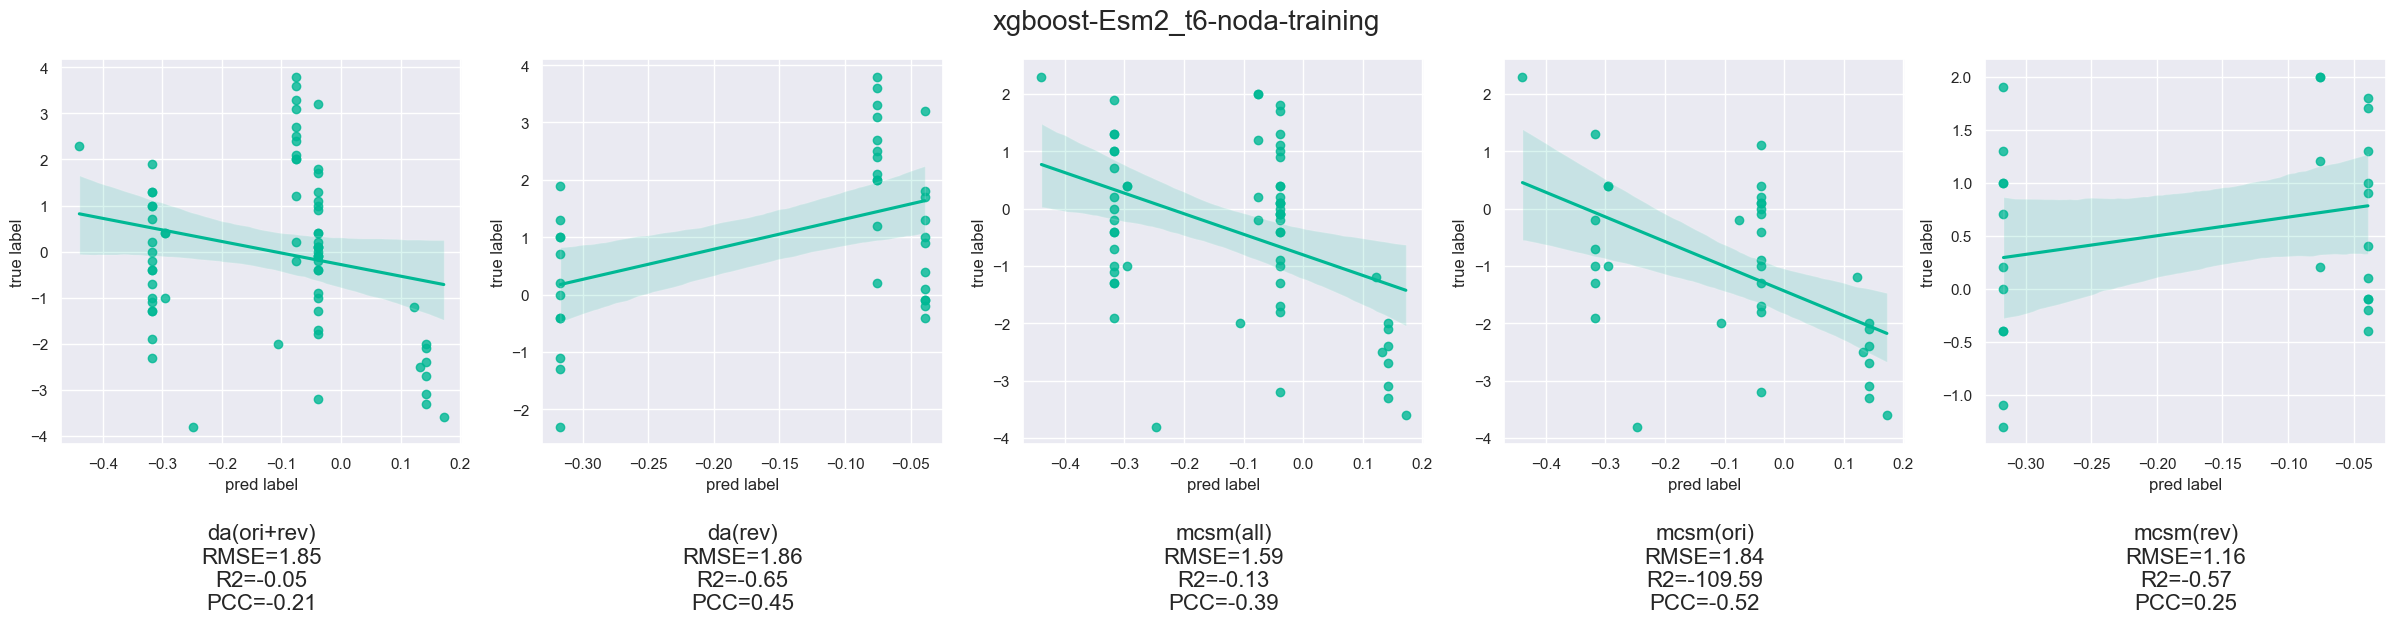

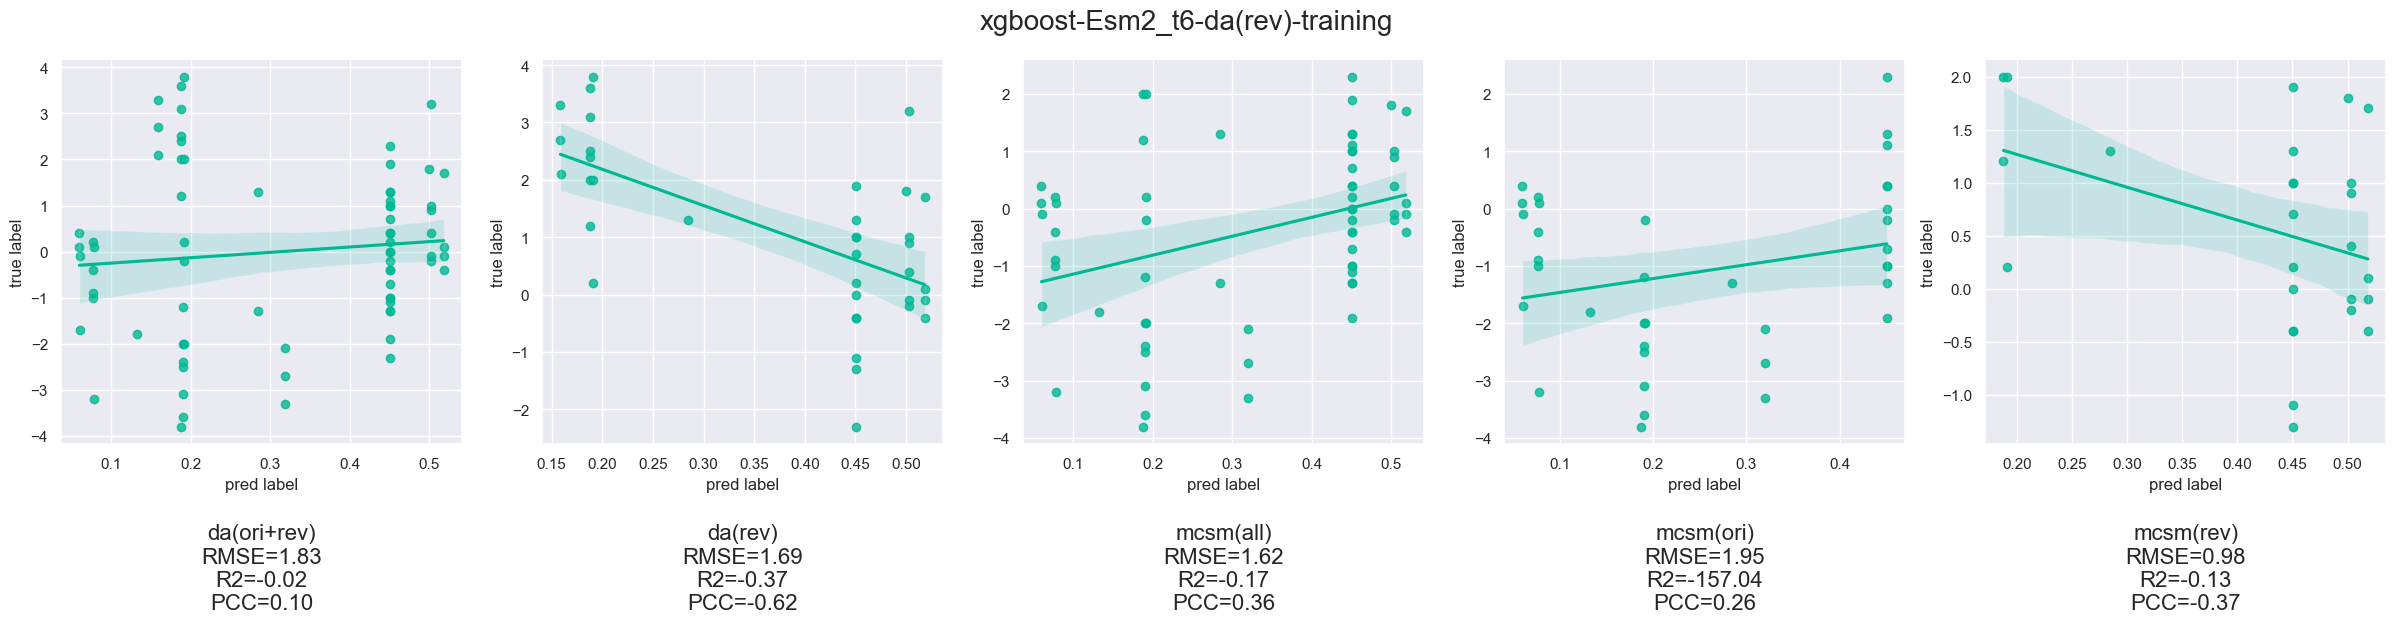

(187, 491520)
(187,)
(374, 491520)
(374,)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (144,) + inhomogeneous part.

In [5]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
sns.set(color_codes=True)

for key in config_dict.keys():
    # prepare datasets
    train_pkl1 = pd.read_pickle('../../../datasets/final/protein_embedding/train_stab_da(ori)_' + key + '.pkl')
    train_pkl2 = pd.read_pickle('../../../datasets/final/protein_embedding/train_stab_da(ori+rev)_' + key + '.pkl')
    #train_pkl3 = pd.read_pickle('../../../datasets/final/protein_embedding/train_stab_da(ori+rev+non)_' + key + '.pkl')
    #test_pkl1 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_da(non)_' + key + '.pkl')
    test_pkl2 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_da(ori+rev)_' + key + '.pkl')
    test_pkl3 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_da(rev)_' + key + '.pkl')
    test_pkl4 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_mcsm(all)_' + key + '.pkl')
    test_pkl5 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_mcsm(ori)_' + key + '.pkl')
    test_pkl6 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_mcsm(rev)_' + key + '.pkl')

    shuffled = train_pkl1
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_train1 = np.array(sample_list)
    Y_train1 = shuffled['label'].values
    print(X_train1.shape)
    print(Y_train1.shape)

    shuffled = train_pkl2
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_train2 = np.array(sample_list)
    Y_train2 = shuffled['label'].values
    print(X_train2.shape)
    print(Y_train2.shape)

    #########################################################################

    shuffled = test_pkl2
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test2 = np.array(sample_list)
    Y_test2 = shuffled['label'].values

    shuffled = test_pkl3
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test3 = np.array(sample_list)
    Y_test3 = shuffled['label'].values

    shuffled = test_pkl4
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test4 = np.array(sample_list)
    Y_test4 = shuffled['label'].values

    shuffled = test_pkl5
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test5 = np.array(sample_list)
    Y_test5 = shuffled['label'].values

    shuffled = test_pkl6
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test6 = np.array(sample_list)
    Y_test6 = shuffled['label'].values

    clf = XGBRegressor(n_estimators=500,learning_rate=0.001)
    clf.fit(X_train1, Y_train1)
    Y_pred2 = clf.predict(X_test2)
    Y_pred3 = clf.predict(X_test3)
    Y_pred4 = clf.predict(X_test4)
    Y_pred5 = clf.predict(X_test5)
    Y_pred6 = clf.predict(X_test6)

    rmse_list = []
    r2_list = []
    pcc_list = []

    rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_pred5, Y_test5)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

    r2_list.append(r2_score(Y_test2, Y_pred2))
    r2_list.append(r2_score(Y_test3, Y_pred3))
    r2_list.append(r2_score(Y_test4, Y_pred4))
    r2_list.append(r2_score(Y_pred5, Y_test5))
    r2_list.append(r2_score(Y_test6, Y_pred6))

    pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
    pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
    pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
    pcc_list.append(pearsonr(Y_pred5, Y_test5)[0])
    pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

    fig = plt.figure(figsize=(30,5))

    plt.subplot(1, 5, 1)
    plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred2,y=Y_test2,color=config_dict[key]['color'])

    plt.subplot(1, 5, 2)
    plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred3,y=Y_test3,color=config_dict[key]['color'])

    plt.subplot(1, 5, 3)
    plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred4,y=Y_test4,color=config_dict[key]['color'])

    plt.subplot(1, 5, 4)
    plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred5,y=Y_test5,color=config_dict[key]['color'])

    plt.subplot(1, 5, 5)
    plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred6,y=Y_test6,color=config_dict[key]['color'])

    plt.suptitle('xgboost-' + key + '-noda-training', fontsize=20)
    plt.savefig('images/xgboost-protein-embedding-noda-training-' + key + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

    clf = XGBRegressor(n_estimators=500,learning_rate=0.001)
    clf.fit(X_train2, Y_train2)
    Y_pred2 = clf.predict(X_test2)
    Y_pred3 = clf.predict(X_test3)
    Y_pred4 = clf.predict(X_test4)
    Y_pred5 = clf.predict(X_test5)
    Y_pred6 = clf.predict(X_test6)

    rmse_list = []
    r2_list = []
    pcc_list = []

    rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_pred5, Y_test5)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

    r2_list.append(r2_score(Y_test2, Y_pred2))
    r2_list.append(r2_score(Y_test3, Y_pred3))
    r2_list.append(r2_score(Y_test4, Y_pred4))
    r2_list.append(r2_score(Y_pred5, Y_test5))
    r2_list.append(r2_score(Y_test6, Y_pred6))

    pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
    pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
    pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
    pcc_list.append(pearsonr(Y_pred5, Y_test5)[0])
    pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

    fig = plt.figure(figsize=(30,5))

    plt.subplot(1, 5, 1)
    plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred2,y=Y_test2,color=config_dict[key]['color'])

    plt.subplot(1, 5, 2)
    plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred3,y=Y_test3,color=config_dict[key]['color'])

    plt.subplot(1, 5, 3)
    plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred4,y=Y_test4,color=config_dict[key]['color'])

    plt.subplot(1, 5, 4)
    plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred5,y=Y_test5,color=config_dict[key]['color'])

    plt.subplot(1, 5, 5)
    plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred6,y=Y_test6,color=config_dict[key]['color'])

    plt.suptitle('xgboost-' + key + '-da(rev)-training', fontsize=20)
    plt.savefig('images/xgboost-protein-embedding-da(rev)-training-' + key + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

In [12]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
sns.set(color_codes=True)

key_list = list(config_dict.keys())
for key in key_list[1:]:
    # prepare datasets
    train_pkl1 = pd.read_pickle('../../../datasets/final/protein_embedding/train_stab_da(ori)_' + key + '.pkl')
    train_pkl2 = pd.read_pickle('../../../datasets/final/protein_embedding/train_stab_da(ori+rev)_' + key + '.pkl')
    #train_pkl3 = pd.read_pickle('../../../datasets/final/protein_embedding/train_stab_da(ori+rev+non)_' + key + '.pkl')
    #test_pkl1 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_da(non)_' + key + '.pkl')
    test_pkl2 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_da(ori+rev)_' + key + '.pkl')
    test_pkl3 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_da(rev)_' + key + '.pkl')
    test_pkl4 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_mcsm(all)_' + key + '.pkl')
    test_pkl5 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_mcsm(ori)_' + key + '.pkl')
    test_pkl6 = pd.read_pickle('../../../datasets/final/protein_embedding/test_stab_mcsm(rev)_' + key + '.pkl')

    shuffled = train_pkl1
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_train1 = np.array(sample_list)
    Y_train1 = shuffled['label'].values
    print(X_train1.shape)
    print(Y_train1.shape)

    shuffled = train_pkl2
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_train2 = np.array(sample_list)
    Y_train2 = shuffled['label'].values
    print(X_train2.shape)
    print(Y_train2.shape)

    #########################################################################

    shuffled = test_pkl2
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test2 = np.array(sample_list)
    Y_test2 = shuffled['label'].values

    shuffled = test_pkl3
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test3 = np.array(sample_list)
    Y_test3 = shuffled['label'].values

    shuffled = test_pkl4
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test4 = np.array(sample_list)
    Y_test4 = shuffled['label'].values

    shuffled = test_pkl5
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test5 = np.array(sample_list)
    Y_test5 = shuffled['label'].values

    shuffled = test_pkl6
    sample_list = []
    for i in range(shuffled.shape[0]):
        feature_list = []
        feature_list += shuffled['seq_before'][i].flatten().tolist()
        feature_list += shuffled['seq_after'][i].flatten().tolist()
        sample_list.append(feature_list)
    X_test6 = np.array(sample_list)
    Y_test6 = shuffled['label'].values

    clf = XGBRegressor(n_estimators=500,learning_rate=0.001)
    clf.fit(X_train1, Y_train1)
    Y_pred2 = clf.predict(X_test2)
    Y_pred3 = clf.predict(X_test3)
    Y_pred4 = clf.predict(X_test4)
    Y_pred5 = clf.predict(X_test5)
    Y_pred6 = clf.predict(X_test6)

    rmse_list = []
    r2_list = []
    pcc_list = []

    rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_pred5, Y_test5)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

    r2_list.append(r2_score(Y_test2, Y_pred2))
    r2_list.append(r2_score(Y_test3, Y_pred3))
    r2_list.append(r2_score(Y_test4, Y_pred4))
    r2_list.append(r2_score(Y_pred5, Y_test5))
    r2_list.append(r2_score(Y_test6, Y_pred6))

    pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
    pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
    pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
    pcc_list.append(pearsonr(Y_pred5, Y_test5)[0])
    pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

    fig = plt.figure(figsize=(30,5))

    plt.subplot(1, 5, 1)
    plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred2,y=Y_test2,color=config_dict[key]['color'])

    plt.subplot(1, 5, 2)
    plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred3,y=Y_test3,color=config_dict[key]['color'])

    plt.subplot(1, 5, 3)
    plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred4,y=Y_test4,color=config_dict[key]['color'])

    plt.subplot(1, 5, 4)
    plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred5,y=Y_test5,color=config_dict[key]['color'])

    plt.subplot(1, 5, 5)
    plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred6,y=Y_test6,color=config_dict[key]['color'])

    plt.suptitle('xgboost-' + key + '-noda-training', fontsize=20)
    plt.savefig('images/xgboost-protein-embedding-noda-training-' + key + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

    clf = XGBRegressor(n_estimators=500,learning_rate=0.001)
    clf.fit(X_train2, Y_train2)
    Y_pred2 = clf.predict(X_test2)
    Y_pred3 = clf.predict(X_test3)
    Y_pred4 = clf.predict(X_test4)
    Y_pred5 = clf.predict(X_test5)
    Y_pred6 = clf.predict(X_test6)

    rmse_list = []
    r2_list = []
    pcc_list = []

    rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_pred5, Y_test5)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

    r2_list.append(r2_score(Y_test2, Y_pred2))
    r2_list.append(r2_score(Y_test3, Y_pred3))
    r2_list.append(r2_score(Y_test4, Y_pred4))
    r2_list.append(r2_score(Y_pred5, Y_test5))
    r2_list.append(r2_score(Y_test6, Y_pred6))

    pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
    pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
    pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
    pcc_list.append(pearsonr(Y_pred5, Y_test5)[0])
    pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

    fig = plt.figure(figsize=(30,5))

    plt.subplot(1, 5, 1)
    plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred2,y=Y_test2,color=config_dict[key]['color'])

    plt.subplot(1, 5, 2)
    plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred3,y=Y_test3,color=config_dict[key]['color'])

    plt.subplot(1, 5, 3)
    plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred4,y=Y_test4,color=config_dict[key]['color'])

    plt.subplot(1, 5, 4)
    plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred5,y=Y_test5,color=config_dict[key]['color'])

    plt.subplot(1, 5, 5)
    plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
    plt.ylabel("true label")
    plt.xlabel("pred label")
    sns.regplot(x=Y_pred6,y=Y_test6,color=config_dict[key]['color'])

    plt.suptitle('xgboost-' + key + '-da(rev)-training', fontsize=20)
    plt.savefig('images/xgboost-protein-embedding-da(rev)-training-' + key + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

(187, 655360)
(187,)
(374, 655360)
(374,)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(320, 512)
(

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (216,) + inhomogeneous part.